In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import torch

In [2]:
X, Y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 20, cluster_std = 1)

In [3]:
def H(p, n):
  h = 0
  p, n = p/(p+n), n/(p+n)
  if((p != 0.0) & (n != 0.0)):
    h = -1*(p*np.log2(p)+n*np.log2(n))

  return h

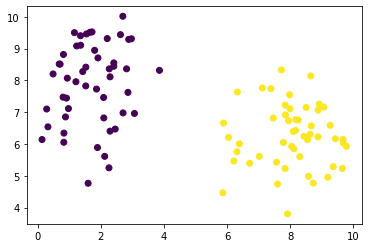

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

4
4.5
8
8.5
4
4.5


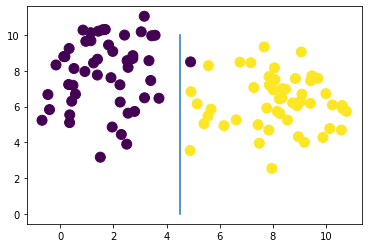

In [5]:
import numpy as np
global flag, k
def H(p,n):
  h = 0
  if (p!=0 & n != 0):
    p1 = p/(p+n)
    n1= n/(p+n)
    h = -(p1*np.log2(p1) + n1*np.log2(n1))
  elif (p== 0 & n != 0):
    n1= n/(p+n)
    h = - n1*np.log2(n1)
  elif (p!= 0 & n == 0):
    p1 = p/(p+n)
    h = -p1*np.log2(p1)
  return h
  
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=2, n_features=2,\
random_state=20,cluster_std=1.5)
#X = np.array([[1,1],[2,1.5],[3,1],[4,0.7]])
#Y= np.array([1,1,0,0])
# import matplotlib.pyplot as plt
# plt.scatter(X[:,0],X[:,1],c=Y,s=100)
total = 100
p=50
n=50

E_root = H(50,50)
#print(E_root)
P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

#print(P_X)
LP = P_X.shape[0]
LN = N_X.shape[0]
#print(LP)

IG_List0 =[]
thr0 =[]
for i in range(10):
  x1 = i+0.5
  pos_g = 0
  neg_g = 0
  pos_l = 0
  neg_l = 0
  for i in range (P_X.shape[0]):
    if ((P_X[i,0]>x1)):
      pos_g +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,0]>x1)):
      neg_g+=1 

  for i in range (P_X.shape[0]):
    if ((P_X[i,0]<x1)):
      pos_l +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,0]<x1)):
      neg_l+=1 

  #print(pos_g,neg_g)
  #print(pos_l,neg_l)

  PplusN = pos_g+neg_g+pos_l+neg_l


  IG = E_root - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  #print(IG)
  IG_List0.append(IG)
  thr0.append(x1)

index = IG_List0.index(max(IG_List0))
print(index)
print(thr0[index])

y = np.linspace(0,10,20)
x = thr0[index] * np.ones(20)
# plt.plot(x,y)




# import matplotlib.pyplot as plt
# plt.scatter(X[:,0],X[:,1],c=Y,s=100)
total = 100
p=50
n=50

E_root = H(50,50)
#print(E_root)
P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

#print(P_X)
LP = P_X.shape[0]
LN = N_X.shape[0]
#print(LP)


IG_List1 =[]
thr1 =[]
for i in range(10):
  x1 = i+0.5
  pos_g = 0
  neg_g = 0
  pos_l = 0
  neg_l = 0
  for i in range (P_X.shape[0]):
    if ((P_X[i,1]>x1)):
      pos_g +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,1]>x1)):
      neg_g+=1 

  for i in range (P_X.shape[0]):
    if ((P_X[i,1]<x1)):
      pos_l +=1
  for i in range(N_X.shape[0]):
    if ((N_X[i,1]<x1)):
      neg_l+=1 

  #print(pos_g,neg_g)
  #print(pos_l,neg_l)

  PplusN = pos_g+neg_g+pos_l+neg_l


  IG = E_root - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
  #print(IG)
  IG_List1.append(IG)
  thr1.append(x1)

index = IG_List1.index(max(IG_List1))
print(index)
print(thr1[index])

x = np.linspace(0,10,20)
y = thr1[index] * np.ones(20)
# plt.plot(x,y)




plt.scatter(X[:,0],X[:,1],c=Y,s=100)
if(max(IG_List1) > max(IG_List0)):
  index = IG_List1.index(max(IG_List1))
  print(index)
  print(thr1[index])

  x = np.linspace(0,10,20)
  y = thr1[index] * np.ones(20)
  plt.plot(x,y)
  flag = 1
  k = thr1[index]
else:
  index = IG_List0.index(max(IG_List0))
  print(index)
  print(thr0[index])

  y = np.linspace(0,10,20)
  x = thr0[index] * np.ones(20)
  plt.plot(x,y)
  flag = 0
  k = thr0[index]

In [6]:
def predict(X):
  l = []
  if flag:
    l = [1 if z > k else 0 for z in X[1]]
  else:
    l = [1 if z > k else 0 for z in X[0]]
  return np.array(l)

In [7]:
x_min, x_max = X[:, 0].min()-2, X[:, 0].max()+2
y_min, y_max = X[:, 1].min()-2, X[:, 1].max()+2

In [8]:
h = 0.1

In [9]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [10]:
xx.shape

(126, 155)

In [11]:
Xn = (np.c_[xx.ravel(), yy.ravel()]).T

In [12]:
M = predict(Xn)

In [13]:
M.shape

(19530,)

In [14]:
M = M.reshape(xx.shape)
print(M.shape)

(126, 155)


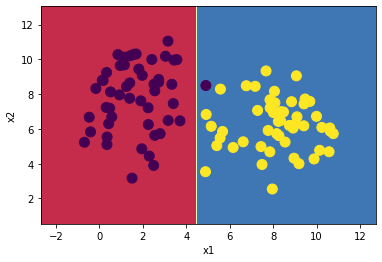

In [15]:
plt.contourf(xx, yy, M, cmap = plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0],X[:,1],c=Y,s=100)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

In [17]:
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', random_state = 1)

In [18]:
y = np.expand_dims(Y, axis = 1)

In [19]:
dt_entropy.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

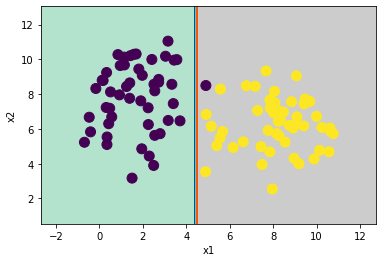

In [20]:
plt.contourf(xx, yy, M, cmap = 'Pastel2')
plt.contour(xx, yy, M, cmap = 'jet')
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0],X[:,1],c=Y,s=100)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


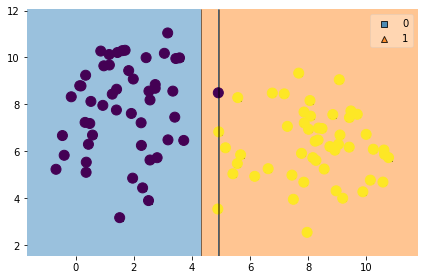

In [21]:
fig, ax = plt.subplots(figsize = (6,4))
plot_decision_regions(X, Y, clf=dt_entropy)
plt.scatter(X[:,0],X[:,1],c=Y,s=100)

plt.tight_layout()
plt.show()